In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [6]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [7]:
df.drop(['availability', 'society', 'area_type'], axis=1, inplace=True)

In [8]:
df.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df.balcony.fillna(df['balcony'].mean(), inplace=True)

In [10]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [11]:
df1 = df.dropna()

In [12]:
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [13]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))
df1.bhk

C:\Users\Admin\AppData\Local\Temp\ipykernel_7960\12062686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))


0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: bhk, Length: 13246, dtype: int64

In [15]:
df1.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [16]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def to_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
# check the non flotable columns..
df1[~df1['total_sqft'].apply(to_float)].head(15)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.000000,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.000000,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.000000,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.000000,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.000000,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.000000,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.000000,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,1.584376,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.000000,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.000000,445.000,4


In [19]:
def range_to_float(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return ((float(tokens[0]) + float(tokens[1])) / 2)
    try:
        return float(x)
    except:
        return None
        

In [20]:
df2 = df1.copy()

In [21]:
df2.total_sqft = df2.total_sqft.apply(range_to_float)

In [22]:
df2.head(10)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.000000,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.000000,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.000000,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.000000,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.000000,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,1.000000,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,1.584376,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,1.584376,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,1.000000,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,1.584376,370.00,6


In [23]:
df2[['balcony', 'bath']] = df2[['balcony', 'bath']].astype('int64')

In [24]:
df2.dtypes

location       object
size           object
total_sqft    float64
bath            int64
balcony         int64
price         float64
bhk             int64
dtype: object

In [25]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2,1,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5,3,120.00,4
2,Uttarahalli,3 BHK,1440.0,2,3,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3,1,95.00,3
4,Kothanur,2 BHK,1200.0,2,1,51.00,2


In [26]:
df2['price_per_sqft'] = (df2['price'] * 100000) / df2['total_sqft']
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,1,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,3,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,3,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,1,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,1,51.00,2,4250.000000


In [27]:
df3 = df2.copy()
df3['location'] = df3['location'].str.strip()

In [28]:
location_counts = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_counts

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [29]:
location_less_than = location_counts[location_counts < 10]
location_less_than

location
2nd Phase JP Nagar       9
Volagerekallahalli       9
Yemlur                   9
4th Block Koramangala    9
Lingarajapuram           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 1039, dtype: int64

In [30]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_less_than else x)
len(df3['location'].unique())

255

In [31]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,1,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,3,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,3,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,1,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,1,51.00,2,4250.000000


In [32]:
df3[df3.total_sqft/df3.bhk < 300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6,1,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9,1,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4,1,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7,0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3,2,100.0,3,20000.000000


In [33]:
df3.shape

(13246, 8)

In [34]:
df4 = df3[~(df3.total_sqft/df3.bhk < 300)]
df4.shape

(12502, 8)

In [35]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
def remove_outlier(df):
    output_df = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        new_df = subdf[(subdf.price_per_sqft > (mean-std)) & (subdf.price_per_sqft <= (mean+std))]
        output_df = pd.concat([output_df, new_df], ignore_index=True)
    return output_df

In [37]:
df5 = remove_outlier(df4)
df5.shape

(10222, 8)

In [38]:
def scatter_plot(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, label='2BHK', color='blue', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', label='3BHK', color='red', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

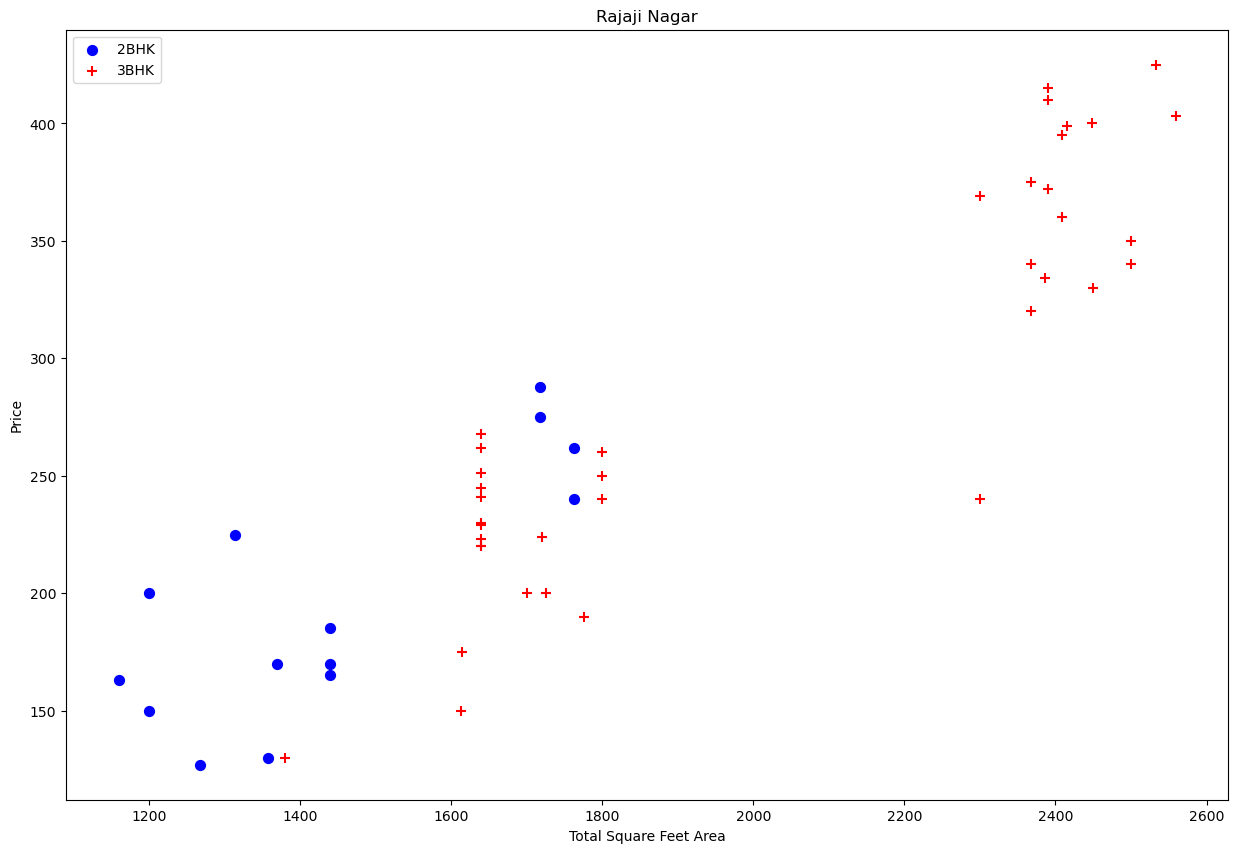

In [39]:
scatter_plot(df5, 'Rajaji Nagar')

In [40]:
def remove_bhk_outlier(df):
    exclude_indexes = np.array([])
    for location, location_df in df.groupby('location'):
        stat_dict = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            stat_dict[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = stat_dict.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indexes = np.append(exclude_indexes, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
        
    return df.drop(exclude_indexes, axis='index')    

In [43]:
df6 = remove_bhk_outlier(df5)
df6.shape

(7369, 8)

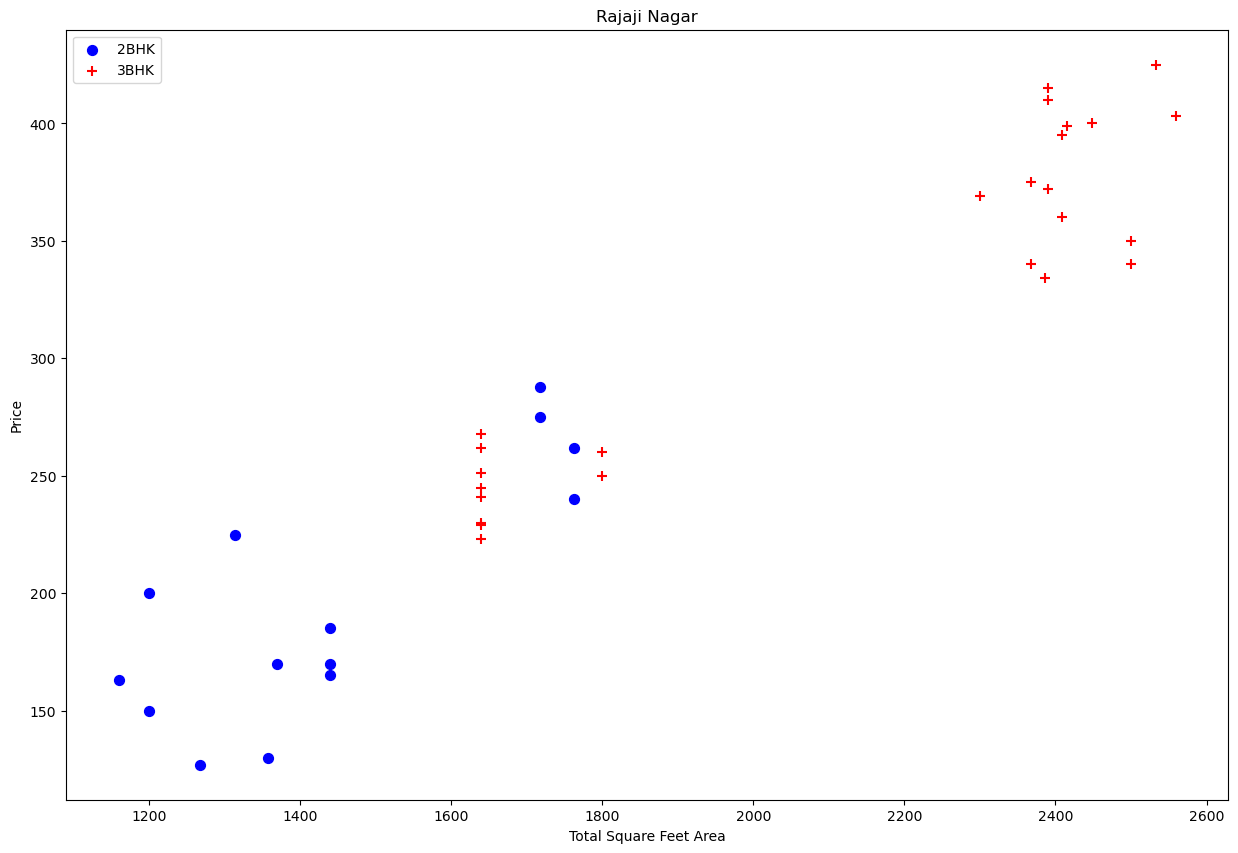

In [44]:
scatter_plot(df6, 'Rajaji Nagar')

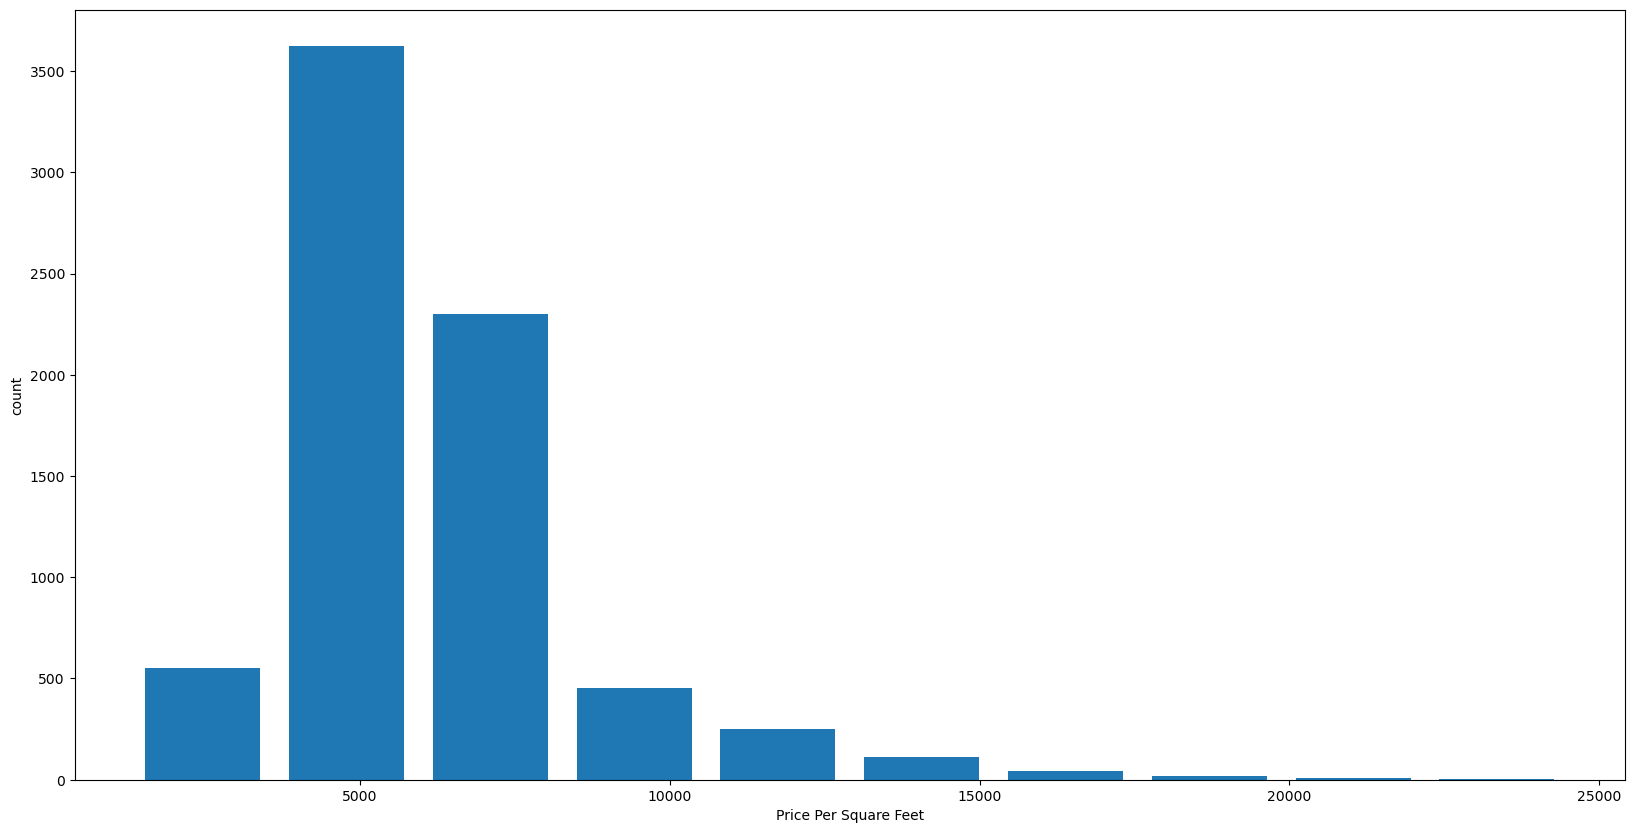

In [45]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.hist(df6.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('count');

In [46]:
df6.bath.unique()

array([ 4,  3,  2,  5,  8,  1,  6, 14,  7,  9, 12, 16, 13], dtype=int64)

In [47]:
df6[df6.bath > 10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14,1,500.0,9,15151.515152
5344,Neeladri Nagar,10 BHK,4000.0,12,1,160.0,10,4000.000000
8547,other,10 BHK,12000.0,12,1,525.0,10,4375.000000
8633,other,16 BHK,10000.0,16,1,550.0,16,5500.000000
9329,other,11 BHK,6000.0,12,1,150.0,11,2500.000000
9642,other,13 BHK,5425.0,13,0,275.0,13,5069.124424


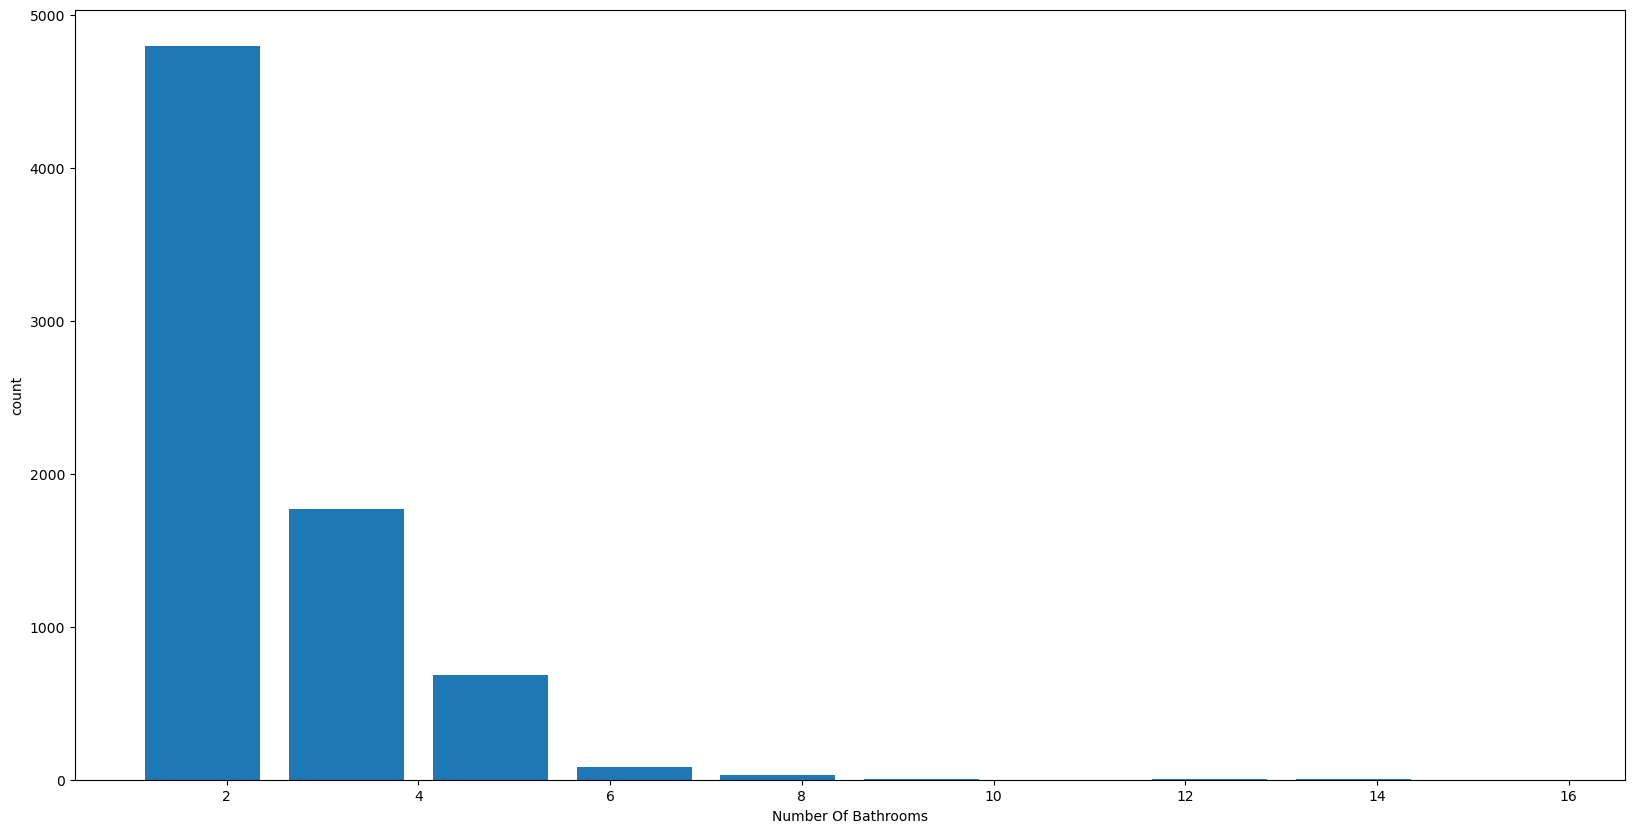

In [48]:
plt.hist(df6.bath, rwidth=0.8)
plt.xlabel('Number Of Bathrooms')
plt.ylabel('count');

In [49]:

df6.shape

(7369, 8)

In [50]:
df7 = df6[df6.bath < df6.bhk + 2]
df7.shape

(7291, 8)

In [51]:
df8 =df7.drop(['size', 'price_per_sqft'], axis=1)
df8.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4,1,428.0,4
1,1st Block Jayanagar,1630.0,3,2,194.0,3
2,1st Block Jayanagar,1875.0,2,3,235.0,3
3,1st Block Jayanagar,1200.0,2,0,130.0,3
4,1st Block Jayanagar,1235.0,2,2,148.0,2


In [52]:
dummies = pd.get_dummies(df8.location)
dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df9 = pd.concat([df8, dummies.drop('other', axis='columns')], axis='columns')
df9.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4,1,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3,2,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2,3,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2,0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2,2,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df10 = df9.drop('location', axis=1)
df10.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,1,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,2,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2,3,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2,2,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
X = df10.drop(['price', 'balcony'], axis=1)
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
y = df10.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8556662450161905

In [104]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84196276, 0.82904236, 0.90136194, 0.85131228, 0.84354632])

In [105]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_model(X, y):
    algos = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': ['True', 'False']
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha':[1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model':DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, error_score="raise", return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model':algo_name,
            'best score':gs.best_score_,
            'best params': gs.best_params_
        })
    return scores

best_model(X, y)

[{'model': 'Linear Regression',
  'best score': 0.8534451320645248,
  'best params': {'fit_intercept': 'True'}},
 {'model': 'lasso',
  'best score': 0.703369755930216,
  'best params': {'alpha': 1, 'selection': 'cyclic'}},
 {'model': 'decision_tree',
  'best score': 0.733020276354176,
  'best params': {'criterion': 'squared_error', 'splitter': 'random'}}]

In [106]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)

In [110]:
def prediction(location, sqft, bath, bhk):
    index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    if index >= 0:
        x[index] = 1
    return lr.predict([x])[0]

In [115]:
prediction('1st Phase JP Nagar', 1000, 2, 2)

F:\ml_projects\house_price\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.10543612135704

In [116]:
prediction('1st Phase JP Nagar', 1000, 3, 3)

F:\ml_projects\house_price\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.39878275521973

In [117]:
prediction('Indira Nagar', 1000, 2, 2)

F:\ml_projects\house_price\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


172.1632243285194

In [118]:
import pickle
with open('bangalore_house_price_model.pickle', 'wb') as f:
    pickle.dump(lr, f)

In [119]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))